SHARAF NAGATHEJA
nasharaf@iu.edu
Applied Algorithms Assignment HW5

                                               Question 1

Problem 1.1: The brute-force pattern-matching algorithm [10 pt.] Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in Ω(dp) time.The lengths of D and P are d and p, respectively

In [7]:
def brute_force(D,P):
    print("len of text(D)",len(D))
    print("len of pattern(P)",len(P))
    text_len=len(D)
    pattern_len=len(P)
    number_of_comparisions=0
    # comparing each index of T in pattern D
    for i in range(text_len-pattern_len+1):
        print(f"For Text index {i} no of comparions with pattern:{number_of_comparisions}")
        number_of_comparisions+=1 
        
        j=0
        while j<pattern_len :
            number_of_comparisions+=1 
            
            # when Text element matches with pattern element
            if(P[j]==D[i+j]):   
               
               j+=1
            # when pattern is found    
            if(j==pattern_len):
                
                print("Total no of operations/ comparisions",number_of_comparisions)   
                return i
            # when mismatch is found
            elif(P[j]!=D[i+j]):
                break
     
    return -1    


D="GGGGGGGGGA"
P="GA"

result=brute_force(D,P)
if(result==-1):
    print("pattern is not fount in  Text ")
print("Pattern is fount at index :",result)

len of text(D) 10
len of pattern(P) 2
For Text index 0 no of comparions with pattern:0
For Text index 1 no of comparions with pattern:2
For Text index 2 no of comparions with pattern:4
For Text index 3 no of comparions with pattern:6
For Text index 4 no of comparions with pattern:8
For Text index 5 no of comparions with pattern:10
For Text index 6 no of comparions with pattern:12
For Text index 7 no of comparions with pattern:14
For Text index 8 no of comparions with pattern:16
Total no of operations/ comparisions 19
Pattern is fount at index : 8


Two loops are maintained in the above program. One loop is for the text, while the other is for the pattern. We are traversing from the Text's beginning index to its end index, i.e. 0 to len(D)-len(P)+1. We are comparing the text with the pattern's starting index for each index of text.

If a match is detected, the next element of the text is compared to the next element of the pattern. If the match is not detected, we increase the text's index by one and compare the text's index element with the pattern's starting index.



When the pattern is found, the index of the pattern in the text is returned; if the pattern is not found, the procedure continues until the end of the text.

The time complexity is O(d*p), where d is the text length and p is the pattern length.

for the text D="GGGGGGGGGA" pattern P="GA": 2 comparisons for text index 0; 2 comparisons for text index 1; 2 comparisons for text index 2; 2 comparisons for text index 3; 2 comparisons for text index 4; 2 comparisons for text index 5; 2 comparisons for text index 6; 2 comparisons for text index 7; 2 comparisons for text index 8; 2 comparisons for text index 9; 2 comparisons for text index 10; 2 comparisons for text index 11

Two comparisons are made for the text index 7; two comparisons are made for the text index 8; two comparisons are made for the text index 9; two comparisons are made for the text index 10; two comparisons are made for the text index 11; two comparisons are made for the text index 12; two comparisons are made for the text index 13; two comparison (i.e. length of the pattern P)

Here, index 9 is the document's index, indicating that the text is almost complete.

As a result, the total number of operations / comparisons = d*p.

As a result, the time complexity is O(d*p).

1.2 Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D.

In [8]:
def brute_force(D,P):
    text_len=len(D)
    pattern_len=len(P)
    traversal=len(D)-len(P)+1
    count=0
    i=0
    while i<traversal:
        j=0
        while j<pattern_len and P[j]==D[i+j]:
            j+=1
        if j==pattern_len:
            count+=1
            i+=pattern_len
            
        else:
            i+=1
        
    return count 

D="cdcdcdcdc"
P="cdc"
print(f"Non Overlapping occurences of pattern P :{P} in Text D :{D} is :",brute_force(D,P))

Non Overlapping occurences of pattern P :cdc in Text D :cdcdcdcdc is : 2


Each text index is matched with the pattern in the brute force method. As a result, even after the pattern is detected, there are overlapping occurrences of the pattern P in text D.

To avoid this, when we found the pattern, we increased the text's index to I = i+ pattern length (i=i+p) in order to avoid detecting overlapping occurrences if the P in D.

We increment the variable count by 1 once the pattern is detected, and then print this value, which contains the non-overlapping instances of the pattern P in D.

Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.

In [9]:
def boyer_moore_match(text, pattern):
    
   
    m = len(pattern)
    n = len(text)
    last={} 
    count=0
    
    # maintaining the last index of each element in the pattern .
    for k in range(m):
        last[pattern[k]]=k
   
    i = m - 1  # text index
    j = m - 1  # pattern index
    while i < n:
        
        # when match is found
        if text[i] == pattern[j]:
            # when pattern is found
            if j == 0:
                #return i
                count+=1
                i=i+2*m-1
                j=m-1
                
                
                
            else:
                i -= 1
                j -= 1
        # when mismatch is found        
        else:
            
            l = last.get(text[i],-1)
            i = i + m - min(j, 1+l)
            j = m - 1
            
    return count
text = 'cdcdcdcdc'
pattern = 'cdc'

print(f"Non Overlapping occurences of pattern P :{P} in Text D :{D} is :",boyer_moore_match(text,pattern))

Non Overlapping occurences of pattern P :cdc in Text D :cdcdcdcdc is : 2


Boyer Moore pattern matching is as follows:

We keep a dictionary of pattern elements with the key being their last index occurrences in the pattern and the values being their last index occurrences in the pattern.
We compare the text to the pattern from the previous index, therefore I =j=m-1, where m is the length of the P.
When the pattern element matches the text element, the index of the text and pattern elements is decremented, i.e. j=0. return the I which is the pattern's index in D
When a mismatch is discovered, we check to see if the text element is contained in the pattern and shift the index I to i+m-min(j,l+1), where l is the element's last index.
Last[text element] returns -1 if the element is not in the pattern.

To avoid the non overlapping occurrences of the pattern P in D ,as the index i moves to the left of the text on finding the pattern . We have incremented the text index by i+2*m-1 where i is the current text index ,m is the length of the Pattern and j to m-1 i.e. last index of the pattern.

From here Boyer Moore matching starts . and finally count of the occurrences are returned .

Similar to problem 1.2.1, modify the KMP program.

In [11]:
def suffix_table(P):
    m=len(P)
    j=1
    k=0
    table=[0]*m
    while(j<m):
        if(P[j]==P[k]):
            table[j]=k+1
            j+=1
            k+=1
        elif(k>0):
            k=table[k-1]
        else:
            j+=1
            
    return table

In [12]:
def KMP(T,P):
    if(len(P)==0):
        return 0
    n=len(T)
    m=len(P)
    j=0
    k=0
    count=0
    table=suffix_table(P)
    while(j<n):
        if(T[j]==P[k]):
            if(k==m-1):
                #return j-m+1
                count+=1
                k=0
                j+=1
                #return count
            else:    
             j+=1
             k+=1
        elif(k>0):
            k=table[k-1]
        else:
            j+=1
    return count        

In [13]:
#D="abacababacababacabacab"
#P="abacab"
D = 'cdcdcdcdc'
P = 'cdc'

print(f"Non Overlapping occurences of pattern P :{P} in Text D :{D} is :",KMP(D,P))

Non Overlapping occurences of pattern P :cdc in Text D :cdcdcdcdc is : 2


In the KMP pattern matching , we maintain a table that maintains the count of the prefix, suffix match for the given pattern.
Then for each index of text we match it with the pattern index ,

if match is found , we increment both the text and pattern index by 1
if mismatch is found , if the pattern index is greater than 0 then we assign its index to table[k-1] if the pattern index =0 then increment the text index by 1 .
Continue this till the end of the text or till pattern is found .


Finding non-overlapping occurrences of P in D: Once P is identified in D, the pattern index is set to 0 and the text index is set to 1. There is a variable count that is kept. When a pattern is identified, it is incremented by 1, and the non-overlapping occurrences of P in D are returned.

                                                 Question-2

Question 2:
Perform an experimental analysis of pattern matching algorithms in terms of:

Number of character comparison: Perform an experimental analysis of the efficiency of the brute-force, the KMP and Boyer-Moore pattern matching algorithms for varying-length patterns.

In [14]:
import time
import sys
import random
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def brute_force_ea(D,P):
    
    text_len=len(D)
    
    pattern_len=len(P)
    number_of_comparisions=0
    # comparing each index of T in pattern D
    for i in range(text_len-pattern_len+1):
        
        number_of_comparisions+=1 
        
        j=0
        while j<pattern_len :
            number_of_comparisions+=1 
            
            # when Text element matches with pattern element
            if(P[j]==D[i+j]):   
               
               j+=1
            # when pattern is found    
            if(j==pattern_len):
                
                comparison_brute_force.append(number_of_comparisions) 
                
                return i
            # when mismatch is found
            elif(P[j]!=D[i+j]):
                break
     
    comparison_brute_force.append(number_of_comparisions) 
    return -1    




In [16]:
def boyer_moore_match_ea(text, pattern):
    
   
    m = len(pattern)
    n = len(text)
    last={} 
    
    number_of_comparisions=0
    # maintaining the last index of each element in the pattern .
    for k in range(m):
        last[pattern[k]]=k
   
    i = m - 1  # text index
    j = m - 1  # pattern index
    while i < n:
        number_of_comparisions+=1
        # when match is found
        if text[i] == pattern[j]:
            # when pattern is found
            if j == 0:
                comparison_boyer_moore.append(number_of_comparisions)  
                return i
                
                
                
                
            else:
                i -= 1
                j -= 1
        # when mismatch is found        
        else:
            
            l = last.get(text[i],-1)
            i = i + m - min(j, 1+l)
            j = m - 1
    comparison_boyer_moore.append(number_of_comparisions)         
    return -1


In [17]:
def suffix_table_ea(P):
    m=len(P)
    j=1
    k=0
    table=[0]*m
    while(j<m):
        
        if(P[j]==P[k]):
            table[j]=k+1
            j+=1
            k+=1
        elif(k>0):
            k=table[k-1]
        else:
            j+=1
            
    return table

def KMP_ea(T,P):
    if(len(P)==0):
        return 0
    n=len(T)
    m=len(P)
    number_of_comparisions=0
    j=0
    k=0
    count=0
    table=suffix_table_ea(P)
    
    while(j<n):
        number_of_comparisions+=1
        if(T[j]==P[k]):
            
            if(k==m-1):
                #return j-m+1
                comparison_kmp.append(number_of_comparisions)
                return j-m+1
                
            else:    
             j+=1
             k+=1
        elif(k>0):
            k=table[k-1]
        else:
            j+=1
    comparison_kmp.append(number_of_comparisions)        
    return -1        

In [18]:
if __name__ == "__main__":    
    
    data = 'BTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeiyistoMaybeSeoulorNewYorkorParisLolirokatBTSKorealirngtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTSBTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeyestoMaybeSeoulorNewYorkorParisLookatBTSKoreangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTSBTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeyestoMaybeSeoulorNewYorkorParisLookatBTSKoreangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTSBTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeyestoMaybeSeoulorNewYorkorParisLookatBTSKoreangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTSBTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeyestoMaybeSeoulorNewYorkorParisLookatBTSKoreangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTSBTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeyestoMaybeSeoulorNewYorkorParisLookatBTSKoreangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardBTSIcantunderstandwhatpeoplearesayinWhereisthisplaceIopenmyeyestoMaybeSeoulorNewYorkorParisLookatBTSKoreangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazineBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagaziBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnuBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersBTSKorean방탄소년단RRBangtanSonyeondanalsoknownastheBangtanBoysisaSouthKoreanboybandthatwasformedin2010anddebutedin2013underBigHitEntertainment5TheseptetconsistingofmembersJinSugaJHopeRMJiminVandJungkookcowritesandcoproducesmuchoftheirownoutputOriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenresTheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismTheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineAfterdebutingin2013withtheirsinglealbum2Cool4SkoolBTSreleasedtheirfirstKoreanlanguagestudioalbumDarkWildandJapaneselanguagestudioalbumWakeUpin2014ThegroupssecondKoreanstudioalbumWings2016wastheirfirsttosellonemillioncopiesinSouthKoreaBy2017BTScrossedintotheglobalmusicmarketleadingtheKoreanWaveintotheUnitedStatesandbreakingnumeroussalesrecordsTheybecamethefirstKoreangrouptoreceiveacertificationfromtheRecordingIndustryAssociationofAmericaRIAAfortheirsingleMicDropaswellasthefirstKoreanacttotoptheUSBillboard200withtheirstudioalbumLoveYourselfTear2018BTSbecameoneofthefewgroupssincetheBeatlestoearnfourUSnumberonealbumsinlessthantwoyearsandLoveYourselfAnswer2018wasthefirstKoreanalbumcertifiedplatinumbytheRIAAIn2020BTSbecamethefirstallSouthKoreanacttoreachnumberoneontheBillboardGlobal200andUSBillboardHot100withtheirGrammynominatedsingleDynamiteTheirfollowupreleasesSavageLoveLifeGoesOnButterandPermissiontoDancemadeBTSthefastestacttoaccumulatefiveUSnumberonesinglessinceMichaelJacksonHavingsoldover20millionalbumsontheGaonMusicChartBTSisthebestsellingartistinSouthKoreanhistoryandholdsthebestsellingalbuminSouthKoreawithMapoftheSoul7TheyarethefirstAsianandnonEnglishspeakingacttobenamedInternationalFederationofthePhonographicIndustryIFPIGlobalRecordingArtistoftheYear2020tochartonBillboardsTopTouringArtistsofthe2010splacingatnumber45andtoheadlineandselloutWembleyStadiumandRoseBowlStadiumLoveYourselfWorldTourin2019FeaturedonTimesinternationalcoverasNextGenerationLeadersanddubbedPrincesofPopBTShasalsoappearedonthemagazineslistsofthe25mostinfluentialpeopleontheinternet20172019andthe100mostinfluentialpeopleintheworld2019ThegroupsnumerousaccoladesincludesixAmericanMusicAwardsnineBillboardMusicAwards24GoldenDiskAwardsandnominationsforaGrammyAwardandaBritAwardOutsideofmusictheypartneredwithUNICEFtoestablishtheLoveMyselfantiviolencecampaignaddressedthreeUnitedNationsGeneralAssembliesandbecametheyoungesteverrecipientsoftheOrderofCulturalMeritfromthePresidentofSouthKoreaduetotheircontributionsinspreadingKoreancultureandlanguageContents1Name2Career2120102014Formationandearlyyears2220142017Mainstreamandinternationalbreakthrough221Moderatesuccessandfirstconcerttour222Mainstreambreakthroughandcommercialsuccess223Internationalexpansionandcollaborations2320182020Continuedworldwidesuccess231WorldwiderecognitionandLoveYourselfalbumseries232MapoftheSoulPersonastadiumworldtourandBTSWorld233MapoftheSoul7DynamiteandBe242021presentBTStheBestButterandPermissiontoDance3Artistry31Influences32Musicalstyle33Lyricalthemes4Legacyandculturalimpact5Commercialendorsements6Awardsandachievements7Members8Discography9Filmography10Concerttours11Seealso12References13ExternallinksNameThegroupsnameBTSstandsfortheKoreanphraseBangtanSonyeondanKorean방탄소년단Hanja防彈少年團literallymeaningBulletproofBoyScoutsAccordingtomemberJHopethenamesignifiesthegroupsdesiretoblockoutstereotypescriticismsandexpectationsthataimonadolescentslikebullets67InJapantheyareknownasBōdanShōnendan防弾少年団whichtranslatessimilarly8InJuly2017BTSannouncedthattheirnamewouldalsostandforBeyondtheSceneaspartoftheirnewbrandidentity9ThisextendedtheirnametomeangrowingyouthBTSwhoisgoingbeyondtherealitiestheyarefacingandgoingforward10CareerBTSin2013performingattheIncheonMusicCenter20102014FormationandearlyyearsBTSbeganitsformationin2010afterBigHitEntertainmentCEOBangSihyukmetwithgroupleaderRMandwasimpressedwithhisrapping11BTSwasoriginallysupposedtobeahiphopgroupsimilartoYGEntertainments1TYM12butbetweentheirinitialformationandtheirdebutBangSihyukdecidedinsteadtocreateanidolgroupsimilartoSeoTaijiandBoyswhowerepopularinthe90sAgroupabletomakesociallyconsciousmusicwithouttherestrictionsKpopbandswereknownforabletobesincereandgenuineatatimewhereKpopbandswerehighlyregimented13Originallyslatedtodebutin2011thegroupfeaturedonseveraltracksbyartistslike2AMandLeeSeunggibeforetheirdebutwaspostponedTheywerelaterreorganizedintoamoretraditionalidolgroup14SixmonthspriortotheirdebuttheybegantogainattentionfortheirpresenceonvarioussocialmediawebsitesaswellassongcoversonYouTubeandSoundCloud1516WestartedtotellthestoriesthatpeoplewantedtohearandwerereadytohearstoriesthatotherpeoplecouldnotorwouldnottellWesaidwhatotherpeoplewerefeelinglikepainanxietiesandworriesThatwasourgoaltocreatethisempathythatpeoplecanrelatetoSuga17OnJune122013BTSreleasedtheirdebutsinglealbum2Cool4SkoolthefirstinstallmentoftheirschooltrilogyseriessimultaneouslywithitsleadsingleNoMoreDreamwhichquicklyfelloffthecharts1819ThealbumhoweverreachedthetopfiveinSouthKoreaontheGaonMusicChart20TheirsubsequentsingleWeAreBulletproofPt2failedtochartIn2Cool4SkoolBTSemployedanoldschoolhiphopsoundwithscratchesfromthe1980s90sandstrongvisuals21ThesinglealbumsreleasewasfollowedbyseveralappearancesonKoreanmusicshows2223DespitebeingunpolishedcriticssaytheseearlyliveperformancesdemonstratedBTSpotential22ExpandingtheirendeavorstoJapanNoMoreDreamwaslaterrerecordedinJapaneseandreleasedinJune201424InSeptember2013BTSreleasedthesecondparttotheirschooltrilogytheextendedplayORUL82alongwithitssingleNO25DespiteseveralperformancesonKoreanmusicshowsthesinglequicklyfelloffthecharts26ThatsamemonthBTSstarredintheirownvarietyshowSBSMTVsRookieKingChannelBangtanwhichmembersparodiedvarietyshowssuchasVJSpecialForcesandMasterChefKorea27AttheendoftheyearBTSwasrecognizedwithseveralNewArtistoftheYearawardsincludingthe5thMelonMusicAwards28thGoldenDiscAwardsandthe23rdSeoulMusicAwards28293020142017MainstreamandinternationalbreakthroughModeratesuccessandfirstconcerttourExteriorofthenightclubTroubadourphototaken2006whereBTSheldtheirfirstconcertintheUSforfreeThelastactoftheirschooltrilogytheEPSkoolLuvAffair5wasreleasedinJanuary2014andtoppedtheGaonAlbumChart31ItalsomarkedBTSfirstappearanceonBillboardsWorldAlbumsChartpeakingatnumberthree532ThealbumwassupportedbythesinglesBoyinLuvKorean상남자RRSangnamjaandJustOneDayKorean하루만RRHaruman33FollowingSkoolLuvAffairsreleaseBTSmadeseveralappearancesonKoreanmusicshowsandheldtheirfirstfanmeetinginSeoul3435ThatJulyBTSheldtheirfirstconcertintheUSinWestHollywoodforfree36InAugustthegroupalsomadetheirfirstappearanceatKCONinLosAngeles37InAugust2014BTSreleasedtheirfirstKoreanstudioalbumDarkWildwhichpeakedatnumbertwoinSouthKorea38ItwassupportedbytwosinglesDangerandWarofHormoneKorean호르몬전쟁RRHoreumonJeonjaeng39Thealbumservedasanarrativeextensionoftheschooltrilogyandatransitionintotheirnextseries40FollowingseveralappearancesonKoreanmusicshows41BTSembarkedontheirfirstconcerttour2014BTSLiveTrilogyEpisodeIITheRedBulletfromOctobertoDecember42TheirfirstJapanesestudioalbumWakeUp2014releasedthatDecemberpeakedatnumberthreeontheweeklyOriconAlbumsChart43InsupportofthealbumBTSheldtheir1stJapanTour2015WakeUpOpenYourEyesinFebruary201544AfterendingtheirJapantourBTSheldtheirsecondsoloconcertinSouthKoreaBTSLiveTrilogyEpisodeIBTSBeginsinMarchtoacrowdof6500fans45MainstreambreakthroughandcommercialsuccessShiftingtheirsoundandimagefrommasculinehiphoptomorediversestyles46BTSwantedtoexpressthebeautyandanxiousnessofyouthandsettledonthetitleof花樣年華Korean화양연화RRHwayangyeonhwalooselyinterpretedtodefineyouthasthemostbeautifulmomentinlife47TheirthirdEPTheMostBeautifulMomentinLifePart1exploredthehighsandlowsofyouthaswellasitsplayfulandupliftingsides46Thealbumservedasanintroductiontotheiryouthtrilogyagroupofalbumsdedicatedtothestrugglesofyouth10ItsleadsingleINeedUwasBTSfirsttopfivehitinSouthKoreaandgarneredBTSafirstevermusicshowwinonSBSMTVsTheShow4849WhileitssecondsingleDopeKorean쩔어RRJjeoreopeakedatnumberthreeonBillboardsWorldDigitalSongsChartandbecametheirfirstmusicvideotoreceiveover100millionviewsonYouTube5051AgroupofthreealbumsthatthegroupbegantheworldtourextensionoftheirRedBulletTourinJunetitled2015LiveTrilogyEpisodeIITheRedBullet42TheirfourthJapanesesingleForYouwasreleasedonJune17tocelebratethefirstanniversaryoftheirJapanesedebutandtoppedOriconsdailychart52InNovemberBTScommencedtheirthirdconcerttour2015BTSLIVETheMostBeautifulMomentinLifeOnStagedebutingtheirnewsongandtheleadsinglefromtheirfourthEPTheMostBeautifulMomentinLifePart2RunduringtheSeouldates53ThematicallytheEPfocusedmoreontheseriousandspeculativeaspectsofyouthtouchingonthepursuitofsuccesslonelinessaffectionfortheiroriginsandthesufferingoftheyoungergenerationduetounfavorableconditionsincurrentsociety54ThealbumtoppedtheweeklyGaonAlbumandBillboardWorldAlbumscharts5556ItalsomarkedtheirfirstappearanceontheBillboard200chart57BTSperformingatKCONFranceinParisonJune22016TheirfirstKoreancompilationalbumandthefinaletotheiryouthtrilogyTheMostBeautifulMomentinLifeYoungForeverwasreleasedinMay2016ItincludedthreenewsinglesEpilogueYoungForeverFireKorean불타오르네RRBultaoreuneandSaveMe5859ThealbumtoppedGaonWeeklyChartinSouthKoreafortwoconsecutiveweeksandbecametheirsecondconsecutivereleasetochartontheUSBillboard200peakingatnumber107606162TheMostBeautifulMomentinLifeYoungForeverlaterwonBTSfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwards63BTSembarkedontheirAsiatourextension2016BTSLIVETheMostBeautifulMomentinLifeOnStageEpiloguefromMaytoAugust64DuringtheirtourBTSheldalandmarktwodayconcertattheOlympicGymnasticsArenainSeoulinMay65andperformedasfirsttimeheadlinersatbothUSKCONshowsheldthatyearinNewarkandLosAngeles6667BTSwintheirfirstmajorKoreanawardforAlbumoftheYearatthe8thMelonMusicAwardsonNovember192016InSeptember2016BTSreleasedtheirsecondJapanesestudioalbumYouth68Wingscombinedthethemesofyouthpresentedintheirpreviousyouthtrilogywithtemptationandadversity69TheleadsingleBloodSweatTearsachievedamusicchartallkillinSouthKoreaandbecametheirfirstnumberonehitontheweeklyGaonDigitalChart7071Wingsopenedatnumber26ontheUSBillboard200thehighestchartrankingeverforaKpopalbumatthetime72Itwastheirfirstmillionselleralbum73movingover15millioncopiesinSouthKoreathatyearandbecamethebestsellingalbuminGaonAlbumCharthistoryatthetime74InternationalexpansionandcollaborationsInFebruary2017BTSreleasedtherepackagededitionofWingsentitledYouNeverWalkAlonePreordersoftherepackagedbroketherecordformostalbumssoldinamonth7576TherepackageincludeditsleadsingleSpringDay77EmbodyingnostalgiaandsorrowitopenedanewchapterinBTSaestheticsandlyricismandattractedmanyfans69ItenteredtheUSBillboardsBubblingUnderHot100singleschart78SpringDaylaterwonBestSongoftheYearatthe9thMelonMusicAwards79InconjunctionwiththereleaseofYouNeverWalkAloneBTSsecondworldtour2017BTSLiveTrilogyEpisodeIIITheWingsTourbeganinFebruaryandranuntilDecemberOnthetourBTSbegantoplayprogressivelylargervenuesmovingfromhallsintoarenasanddomesTicketsfortheNorthAmericanlegsoldoutwithinminutesandtwoadditionalshowswereaddedduetohighdemandmakingBTSthefirstKpopacttoselloutarenasintheUS8081AftercompletingtheirNorthAmericanlegBTSattendedthe24thBillboardMusicAwardsinMayandwonTopSocialArtistbecomingthefirstKoreangroupawardedaBillboardMusicAward82BTSattheirpressconferenceinSeoulSouthKoreaafterwinningTopSocialArtistatthe24thBillboardMusicAwardsonMay292017CelebratingKoreanmusiciconSeoTaijis25thanniversaryasapartofhisanniversaryprojectTimeTravelerBTSreleasedaremakeofSeoTaijis1995classicComeBackHomeinJuly2017reworkingthesoundandlyricstosimilarsentimentstowardsocietalchangethatSeoTaijioriginallywrotewithBTSnowmaintainingitsoriginallyintenselydarkfeeling83BTSwaslaterinvitedbySeoTaijitoperformasbackupvocalistsanddancersforeightsongsinhisSeoulOlympicStadiumconcertheldearlySeptember8485FollowingthedepictionofgrowthandtemptationinWings2016andconsolationinYouNeverWalkAlone2017BTSembarkedontheirLoveYourselfserieswhichsoughttheenlightenmentofselflovethroughthe起承轉結Korean기승전결RRGiseungjeongyeolnarrativesequenceofbeginningdevelopmentturnandconclusion86InSeptember2017BTSreleasedthefirstpartoftheseriestheirfifthEPLoveYourselfHer8788TheEPwassupportedbytwosinglestheleadsingleDNAandaSteveAokiremixoftheirsongMicDropfeaturingAmericanrapperDesiignerTheEPrepresentedthe承ordevelopmentoftheseriesandisconsideredbyRMtobeoneofthemajorturningpointsinBTScareer89SonicallytheEPservedasadualexplorationofthegroupselectropopandhiphopleanings90BTSatthe45thAmericanMusicAwardsshortlybeforemakingtheirdebutperformanceonUStelevisiononNovember192017CommerciallyBTScontinuedtohitnewcareerheightswiththeLoveYourselfHerEPdebutingatnumbersevenontheBillboard20091InSouthKoreatheEPsoldover12millioncopiesontheGaonAlbumChartinitsfirstmonthachievingthehighestmonthlyalbumsalesinthechartshistoryandthehighestonanyKoreanchartin16yearssecondtogodsChapter4albumin200192ThesingleDNAwasreleasedsimultaneouslywiththeEPanddebutedatnumbertwoinSouthKorea93DNAalsobecamethegroupsfirstentryontheBillboardHot100makingBTSthefirstKpopboybandtodosoandthesecondKoreanactwithaKoreanlanguagesongfollowingPsysGangnamStyle94ThefollowingweekDNArosetonumber67andbecamethehighestchartingsongontheBillboardHot100foraKpopgroupbeatingWonderGirlspreviousrecordatnumber7695ThefollowingsingleMicDropRemixpeakedatnumber28ontheBillboardHot100becomingthefirsttop40entryforaKpopgrouponthechart9697BothMicDropRemixandDNAwerelatercertifiedGoldbytheRecordingIndustryAssociationofAmericaRIAA98makingBTSthefirstandonlySouthKoreanartisttoreceivetwocertifications99MicDropwentontoreceivePlatinumcertificationinNovember2018makingBTSthefirstKoreangroupwithaPlatinumcertifiedsingleintheUS100InDecember2017DNAandMicDropwerereleasedasatripleAsidesingleinJapanwiththenewsongCrystalSnow101whichtoppedtheOriconChart102BTSbecametheonlyforeignartisttohaveasinglecertifieddoubleplatinumbytheRIAJthatyear103InNovember2017BTSbecamethefirstKpopgrouptoperformattheAmericanMusicAwards104105106InDecembertheyalsobecamethefirstKpopgrouptoperformonDickClarksNewYearsRockinEve107andmadetheirJapaneseTVmusicshowdebutonTVAsahisJapanMusicStationSuperLive108AttheendoftheyearBTSwontheirsecondArtistoftheYearatthe19thMnetAsianMusicAwards109becomingthefirstacttowintheawardtwoyearsinarow110TheyalsobecamethefirstartistoutsideofthetopthreeKoreanpopmusicagenciesSMYGandJYPtowinmajorawardsattheGoldenDiscAwards111andtheSeoulMusicAwardsrespectively11220182020ContinuedworldwidesuccessWorldwiderecognitionandLoveYourselfalbumseriesIntheleaduptotheirnextalbumBTSreleasedanoriginaleightepisodedocumentaryseriesexclusivelyonYouTubePremiumentitledBurntheStagethatranfromMarchuntilMay2018offeringabehindthesceneslookatthegroups2017WingsTour113114InAprilthegroupalsoreleasedtheirthirdJapanesestudioalbumFaceYourself115whichdebutedatnumber43ontheBillboard200asthethirdhighestchartingJapanesealbuminthehistoryofthechart116InconjunctionwiththereleaseofFaceYourselfthegroupreleasedanineminuteshortfilmtitledEuphoriaThemeofLoveYourselfWonderfeaturingthesongEuphoria117InMay2018BTSreleasedtheirthirdKoreanlanguagestudioalbumLoveYourselfTearinconjunctionwithanappearanceatthe25thBillboardMusicAwards118AttheshowBTShadtheirfirstperformancewiththepremiereoftheirleadsingleFakeLove119120andwonTopSocialArtistmakingthemtheonlyKoreanartisttowintheawardtwoyearsinarow121122Inthenarrativesequencethealbumcoincidedwiththe轉orturnoftheseriestouchingonthetortuousenlightenmentoflovingwithoutbeinglovedandencouragementtothosewithoutdreams123BTSattheirpressconferenceforLoveYourselfTearonMay242018CommerciallyLoveYourselfTearbecameoneofBTSbestsellingalbumsThealbumdebutedatnumberoneontheUSBillboard200becomingBTSfirstnumberonealbumintheUSthefirstKpopalbumtotoptheUSalbumschartandthehighestchartingalbumbyanAsianact124LoveYourselfTearalsobecameBTSfirsttoptenhitintheUKreachingnumbereightontheUKAlbumsChart125TheirsingleFakeLovebecametheirfirsttoptenhitontheBillboardHot100becomingtheseventeenthnonEnglishsongtoreachthetoptenandthefirstbyaSouthKoreangroup126AttheconclusionoftheLoveYourselfseriesBTSreleasedtheirsecondKoreancompilationalbumLoveYourselfAnswerinAugust2018127whichcontainedsongsfromthepreviousLoveYourselfreleasesalongwithsevenadditionalnewtracks128ThealbumwassupportedbytheleadsingleIdolandthealternativedigitalreleasefeaturingNickiMinaj129130CommerciallyLoveYourselfAnswersoldover19millioncopiesontheGaonAlbumChartinAugust2018breakingthechartsalltimemonthlyrecordonceagain131ThealbumbecameBTSsecondnumberonealbumontheUSBillboard200andtheirhighestsalesweekinthecountryatthattime132makingBTStheonlyKpopactwithtwoBillboard200toppersandthefirstpopactwithtwonumberonealbumsinlessthanayearsinceOneDirectiontoppedthechartwithMidnightMemoriesin2013andFourin2014132LoveYourselfAnswerlaterbecamethefirstKoreanlanguagealbumtobecertifiedGoldbytheRIAAinNovember100InCanadaLoveYourselfAnswerbecamethegroupsfirstnumberonealbumontheCanadianAlbumsChartIntheUSIdolpeakedatnumber11ontheBillboardHot100133ThesingleIdolalsoreachednumberfiveontheCanadianSinglesChartmarkingBTSfirsttoptenhitinCanada134IdolandLoveYourselfAnswerlaterreceivedplatinumcertificationsbothsellingmorethan1millioncertifiedunitsintheUSIdolbecamethegroupsthirdPlatinumsinglewhileAnswerbecamethegroupsfirstPlatinumalbummakingBTSthefirstKoreanartisttoattainthiscertificationintheUS135NewYorkCitysCitiFieldthevenueforBTSfirststadiumconcertintheUSsoldoutin20minutes136InconjunctionwithLoveYourselfAnswersreleaseinAugust2018BTScommencedtheirthirdworldtourBTSWorldTourLoveYourselfwithalandmarkconcertintheSeoulOlympicStadiumthelargeststadiuminSouthKorea137DuringtheirtourBTSalsofeaturedonSteveAokissingleWasteItonMereleasedthatOctoberwhichwastheirfirstallEnglishlanguagefeature138139OntourBTScontinuedtoplaytoprogressivelylargervenuesfromarenastodomestostadiumsForthefinalstopoftheNorthAmericanlegthegroupperformedatCitiFieldinQueensmarkingthefirsttimeaKoreanacthasperformedataUSstadium140AccordingtoStubHubBTSwasoneof2018sbestsellingconcertsininternationalmarketsoutsidetheUSsecondtoonlyEdSheeran141VividSeatsnamedBTSthe2018artistoftheyearcitingthegroupshistorymakingconcertatCitiField142ThatOctoberwithmorethanayearremainingintheircontractBTSrenewedtheircontractwithBigHitEntertainmentthrough2026143InearlyNovember2018apopularJapanesemusicshowcancelledBTSperformancecitingaTshirtamemberworetheyearbefore144InthesamemonththeJewishhumanrightsorganizationSimonWiesenthalCenterSWCstatedthatBTSowedanapologyfortheshirtin2017clothingwithNazisymbolismandaflag145BigHitEntertainmentissuedanapologyexplainingthattheimagesontheclothingwerenotintendedtobehurtfultothevictimsofNazismoratomicbombingsandthatthegroupandmanagementwouldtakestepstopreventfuturemistakesTheyalsostatedtheflagsweremeanttobeacommentaryontheKoreanschoolsystem146TheapologywasacceptedbySWCandtheKoreanAtomicBombVictimAssociation147148AttheendoftheyearBTSwontheirthirdArtistoftheYearatthe20thMnetAsianMusicAwardsinarowandrankednumbereightonBillboardsyearendTopArtistChartalongsidethelikesofDrakeandTaylorSwiftandwerealsothenumbertwoactoftheyearintheDuoGrouprankingonlybehindImagineDragons149150TheyalsomadetheBloomberg50duetotheirwillingnesstoaddresssocialissuesmentalhealthandpoliticsdespitebeinginagenreoftenpaintedasbubblegumpop151Thegroupsoldmorethan10millionalbumsinSouthKoreaalonewith5millionbeingsoldin2018alone152MapoftheSoulPersonastadiumworldtourandBTSWorldInFebruary2019BTSattendedthe61stGrammyAwardsforthefirsttimeasawardpresentersfollowingtheirappearanceattheLAGrammyMuseumin2019153154InAprilTimenamedthemasoneofTime100smostinfluentialpeopleof2019155TheirsixthEPMapoftheSoulPersonawasreleasedonApril12withtheleadsingleBoywithLuvKorean작은것들을위한시RRJageungeotdeureulwihansifeaturingAmericansingerHalsey156TheEPsreleasewasfollowedbyaperformanceonSaturdayNightLiveasthefirstKoreanacttodoso157CommerciallyBTSreachednewcareerheightsMapoftheSoulPersonabecamethefirstKoreanlanguagealbumtoreachthenumberonepositioninboththeUKandAustralia158159andthegroupsthirdconsecutivealbumtotoptheBillboard200andthethirdwithinelevenmonthsjoiningthelikesoftheBeatleswhoachievedthesamein199596BTSarealsothefastestgrouptogetthreenumberonealbumssincetheMonkeesin1967160TheEPbecamethebestsellingphysicalalbumintheUSfortheyearof2019161MapoftheSoulPersonalaterbecamethebestsellingalbumeverinSouthKoreawithmorethan32millionsalesinlessthanamonthPriortoBTSthebestsellinglistsweredominatedbylate1990salbumsmakingBTStheonlyactformedafter2000tobefeaturedinthetop10bestsellinglist162BoywithLuvdebutedatnumber8ontheBillboardHot100thehighestinhistoryforaKoreangroupatthetime163BoywithLuvwascertifiedSilverbytheBPIforsellingover200000unitsmakingitBTSfirstsingletoattainthiscertificationintheUK164BTSperformingatPasadenaCaliforniasRoseBowlinfrontof60000fansFollowingtheirtwowinsatthe26thBillboardMusicAwardsinMayincludingforTopDuoGroupBTSembarkedontheirworldtourstadiumextensionLoveYourselfSpeakYourself165WiththistheybecamethefirstAsianandfirstnonEnglishspeakingartistsevertoheadlineandselloutWembleyStadium166167Alldatessoldoutwithintwohourswithseconddatesforallvenuesaddedduetothehighdemand168IntheleaduptothereleaseoftheirnewmobilegameBTSWorldsetforJune2019BTSreleasedthreecollaborationsinglesDreamGlowfeaturingCharliXCX169ABrandNewDaywithZaraLarsson170andAllNightwithJuiceWrld171ThegroupalsoreleasedthesongHeartbeatwithamusicvideofromthegamesofficialsoundtracktitledBTSWorldOriginalSoundtrack172ThesoundtrackwaslatercertifiedDoublePlatinumbyGaonthefirstsoundtrackalbumtoreceivethecertificationsinceGaonimplementeditin2018173BTSreleasedtheirtenthJapanesesingleLightsonJuly3174PreordersforthedoubleAsidesinglesurpassed1millioncopiesbreakinga24yearoldrecordforforeignartistspreviouslyheldonlybyCelineDionwithher1995singleToLoveYouMoreandmarkedthefirsttimeaKoreanartistachievedamillionshipmentforasingleinJapan175176Lightswentontosellover1millioncopiesandreceivedMillioncertificationbytheRIAJonAugust8thefirsttimeamaleactachievedthissinceMasafumiAkikawasAugust2007singleAThousandWindsItisBTSfirstmillioncertificationinJapansincetheirdebut177LoveYourselfHerandLoveYourselfTearbothcrossed2millioncopiesinAugust178AllthreealbumsoftheLoveYourselfserieshavesoldmorethan2millioncopieseachinSouthKoreaLoveYourselfTearlaterattainedSilverintheUKbecomingtheirthirdalbumtobeattainthiscertificationfollowingLoveYourselfAnswerandMapoftheSoulPersona179ForthefinalstopoftheirrecordbreakingLoveYourselfSpeakYourselfWorldTourthegroupheldarunofthreesoldoutnightsatSeoulsOlympicStadium180ThegroupoutgrossedlegacyrockactsliketheRollingStonesMetallicaandKISSaswellasfellowboybandtheBackstreetBoysmakingthemthetopgrossingtouringgroupof2019181ThatsamemonththegroupreleasedaremixversionofthesongMakeItRightfeaturingLauvasthesecondsinglefromtheiralbumMapoftheSoulPersona182InNovemberBTSbecamethefirstKpopgrouptowinFavoriteDuoorGroupPopRockatthe2019AmericanMusicAwardsandFavoriteSocialArtistconsecutively2018and2019183InDecembertheyattendedboththe2019MelonMusicAwardsand2019MnetAsianMusicAwardsThegroupbecamethefirstartistsinthehistoryofKpoptoreceiveallgrandprizesfrombothceremoniesgettingfourfromeachawardshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS§EndorsementBTShavemaintainednumerousglobalendorsementdealsinvariousindustriesthroughouttheircareerPartneredwithPumasince2015BTSinitiallypromoteditssportswearasPumaKoreasbrandambassadorsbeforeexpandingtobecomeglobalambassadorsin2018321322andpromotingtheremixofPumasTurinandSportstylelineworldwide323324In2019BTSsignedwithFilatoendorseitssportswear325BTShasalsoservedasglobalbrandambassadorsforLGElectronics2018LGG7ThinQtelephone326andforHyundaiMotors2019flagshipSUVthePalisade327andhydrogenfuelcellelectricSUVtheNexo328DuetoBTSendorsementHyundaireceivedalmostdoubletheanticipateddomesticordervolumeforthePalisade329BTSbecameglobalambassadorsoftheelectricstreetracingseriesFormulaEtopromotehowelectricvehiclescanhelpcombatclimatechange330In2020BTSpartneredwithSamsungElectronics331releasingalimitedBTSthemedversionoftheGalaxyS20andGalaxyBuds332AsthefirstmalepopgroupevertocollaboratewithDiorBTSsportedensemblesfromKimJonesPreFall2019collectionattheirconcertatStadedeFrance333AsofApril2021BTShavebeenchosenasLouisVuittonbrandambassadors334AwardsandachievementsMainarticleListofawardsandnominationsreceivedbyBTSBTShasreceivedmanyawardsandhonorsincluding33MnetAsianMusicAwards29MelonMusicAwards24GoldenDiscAwards20SeoulMusicAwardssixKoreanMusicAwards19GaonChartMusicAwardsnineBillboardMusicAwardssixAmericanMusicAwardsandsixMTVVideoMusicAwardsBTSisalsothefirstgroupinhistorytowinTopSongSalesArtistattheBillboardMusicAwardsaswellasfiveconsecutivewinsforTopSocialArtist335Havingsoldover203millionalbumsontheGaonMusicChartBTSarethebestsellingartistinSouthKoreanhistory336337surpassingShinSeunghunsrecordof17millionalbums338InSouthKoreaBTSholdfivemultimillionalbumsandfourplatinumstreamingsingles339340InadditiontobeingthefirstKoreangrouptoreceiveanRIAAcertificationBTShasonetripleplatinumsingleonedoubleplatinumsinglethreeplatinumalbumsthreeplatinumsinglesthreegoldsinglesandonegoldalbumintheUS341InJapanBTSisthefirstmaleforeignacttoreceiveamillioncertificationforasingle342theyalsohavetwomultiplatinumsinglestwomultiplatinumalbumstwoplatinumalbumsandfourgoldalbumsinthecountry343BTSarealsothefirstKoreangrouptoreceivecertificationsintheUKwithtwosilversingles344345onegoldsingle346fivesilveralbumcertifications347andthreegoldalbumcertifications348BTShavealargesocialinfluenceandasof2021haveattained23GuinnessWorldRecordstheywereinductedintotherecordbodys2022HallofFameinSeptember2021includingtheworldrecordformostTwitterengagements349AsofDecember2020theyhavespent210weeksatnumberoneontheBillboardSocial50chart350InOctober2018BTSwasawardedafifthclassHwagwanOrderofCulturalMeritfromthePresidentofSouthKoreafortheircontributionsinspreadingKoreancultureandlanguage315In2019membersofBTSwereinvitedtobecomemembersoftheRecordingAcademyinhonoroftheircontributionstomusicandaspartofapushtohelpdiversifyGrammyAwardvoters351352OnNovember72019BTSbecamethefirstKPopacttoremainontheBillboard200forawholeyear353354AsofJune2021LoveYourselfAnswerhasremainedontheBillboardsmainalbumschartfor100nonconsecutiveweeksmakingitthefirstandcurrentlyonlyKoreanalbumtodoso355BTSholdtherecordforthemostweeks20nonconsecutiveatnumberoneonBillboardsArtist100chartamongallduosandgroups356whileits2020singleDynamiteholdstherecordformostweeks18nonconsecutiveatnumberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersmberoneontheDigitalSongSaleschart357InDecember2020TimemagazinenamedBTStheir2020EntertaineroftheYear358MembersazinenamedBTStheir2020EntertaineroftheYear358MembersinenamedBTStheir2020EntertaineroftheYear358MembersnenamedBTStheir2020EntertaineroftheYear358MembersnamedBTStheir2020EntertaineroftheYear358MembersmyfeetlookdownTheshadowresemblesmeIsittheshadowthatsshakingOrisitmyfeetthataretremblingOfcourseImnotunafraidOfcourseitsnotallokayButIknowAwkwardlyIflowIflytogetherwiththatblackwinHeynananaGottagoinsanetostaysaneHeynananaThrowmyselfwholeintobothworldsHeynananaCantholdmedowncuzyouknowImafighterCarriedmyselfintothisbeautifulprisonFindmeandImgonnalivewithyaBringitbringthepainohyeahComeonupbringthepainohyeahRainbepourinSkykeepfallinEverydayohnananaBringitbringthepainohyeahBringthepainItllbecomemybloodandfleshBringthepainNofearnowthatIknowthewayBreatheonthesmallthingsMyairandmylightinthedarkThepowerofthethingsthatmakememeEvenifIfallIcomerightupscreamEvenifIfallIcomerightupscreamThatshowwevealwaysbeenEvenifmykneesdroptothegroundAslongastheydontgetburiedItwontmatterWinnomatterwhatWhateveryousaywhatevertheysayIdontgiveauhhIdontgiveauhhIdontgiveauhhyeahHeynananaGottagoinsanetostaysaneHeynananaThrowmyselfwholeintobothworldsHeynananaCantholdmedowncuzyouknowImafighterCarriedmyselfintothisbeautifulprisonFindmeandImgonnalivewithyaComeonupbringthepainohyeahRainbepourinSkykeepfallinEverydayohnananaEhOhBringitbringthepainohyeahWheremypainliesLetmetakeabreathMyeverythinMybloodandtearsGotnofearsImsinginohhhhhOhImtakinoverYoushouldknowyeahCantholdmedowncuzyouknowImafighterChoosingtodescendintothedarkabyssFindmeandImgonnableedwithyaComeonupbringthepainohyeahRainbepourinSkykeepfallinEverydayohnananaFindmeandImgonnableedwithyaBringitbringthepainohyeahComeonupbringthepainohyeahAllthatIknowIsjustgoinonandonandonandonBringitbringthepainohyeahLetsgoyeahyeahyeahCracklethatemberburnsupagainSwallowsfirstbeforeitreachestheoilWithoutdoubtboundtobesweptawayyeahyeahhmmTodaysplayeriscominginwiththenumberofoffensesyeahWhenitstartstobiteboomboomboomItbecomestheneighborhooddrumboomboomboomNudgenudgetouchingmefornoreasonnudgenudgeyeahIftheresnoreactionjustsoakitinsplishsplashyeahThetruthsmaybecomefalsetheliesmaybecometrueInthisplaceeveryonebecomessomeonewithperfectethicsAndperfectjudgmentthatsfunnyRageOfcourseyouneeditWhenitburnsuptheresalwaysareasonMayhapsitsourhistorySometimesitchangestheworldButthisisnotragethisisexcretionWhichoneisrageyouknowPretendingitsrageandkillingrealrageFedupthecountlessnumberofpeopleYourenotjustkillingmeyourenotWereusedtosteppingonshitweareLookatthosepeoplewhovegrownnumblookExcretionapathyyouguysareateamyeahIgoUGHUGHIgoUGHUGHImragingatthemalicefilledrageImragingatthemalicefilledrageIgoUGHUGHIgoUGHUGHImragingattheragethathadtodieoutImragingattheragethathadtodieoutyeahyeahYeahUGHUGHJustgoUGHUGHUntilitallbecomesashesyeahgoUGHUGHYeahUGHUGHJustgoUGHUGHUntilitbreaksyeahgoUGHUGHIgoUGHUGHIgoUGHUGHImragingatthemalicefilledrageImragingattheragethathadtodieoutheyThisworlditistakenoverbyrageItseemsthatnobodycanlivewithoutrageRagingagainragingandragingGoinginsanelikeUGHUGHUGHUGHTherearetensofthousandsofreasonstoberagingGoodwillandevilwillalltheverysameIcanragebutifthereweretobedamagedoneTootherslivesIdontlikeThatsstopayySomeonegetshurtatsomeonesactionsSomeonebecomesgloomyatsomeonesspeechandbehaviourSomeonesspurofthemomentbecomessomeonesmomentSomeonesragebecomessomeoneslifeDamnptooeyIgoUGHUGHIgoUGHUGHImragingatthemalicefilledrageImragingattheragethathadtodieoutheyAhwhatthehellistheretobeupsetaboutbeingcriticizedabitYouearnalotwhyareyouwhiningagainYoudhavetoputupwithatleastthatmuchahemAhemahemahemahemYallahemahemahemahemIfIweretheonetoldtodoitIwouldendureitallYallahemyallahemahemahemahemIfIweretheonejustahemahemahemIgoUGHUGHIgoUGHUGHImragingatthemalicefilledrageImragingatthemalicefilledrageIgoUGHUGHIgoUGHUGHImragingattheragethathadtodieoutImragingattheragethathadtodieoutyeahyeahBTSalsoknownasBangtanboysisaSouthKoreanboybandcomposedofsevenmembersThesevenmembersarerappersKimNamjoonage23MinYoongiage24andJungHoseokage23TheyarejoinedbythevocalsofKimTaehyungage21Jeonggukage20KimSeokjinage24andParkJiminage22BTSreleasedtheirfirstalbum2CoolforSkoolin2013whichhasbeenproducedbyBigHitEntertainmentNowoverfiveyearslatertheyhavereleasedamultitudeofalbumsTheirmostrecentalbumLoveYourselfHerwasreleasedonSeptember182017ThealbumcontainsninetracksincludingaskitfromtheBillboardMusicAwardsandtwohiddentracksTheirsongDNAhasevenallowedthemtoperformatthe2017AmericanMusicAwardsfortheveryfirsttimesince2012whenSouthKoreansingerPsyperformedhishitsongGangnamStyleAlthoughtheirnewestalbumhasbroughtBTSmorefamethantheyhaveeverhadmyfavoritesongtheyhavecreatedis21stCenturyGirlsbecauseofthewaythattheyhelpyoungergirlsunderstandthattheyarebeautifulthewaythattheyareTheysayintheirsongwhichtranslatestotellthemthatyourestrongtellthemyoureenoughInmostofBTSssongstheytalkaboutwomenbuttheyarealwaysrespectfulabouthowtheydescribeherandhowtheyappreciateherUnliketodaysmusicwherethelyricscontainmultiplesexanddrugrelatedreferencesBTScontinuestoacknowledgewomenyounggirlsandcurrenteventsallwhilebeingcompletelyappropriateandrespectfulIhavebeenafanofBTSsinceAugustof2017andIquicklybecameobsessedwiththeirmeaningfullyricsandincrediblevoicesButmostofallIfellinlovewiththeirbrilliantchoreographyTheboysofBTSspenddayandnightpracticingtheirdancesfrompreviousmusicvideosandlearningentirelynewchoreographywhilefilmingtheirdailyactivitiesperformingatconcertsgettinganeducationandattendingtalkshowsallovertheworldEvenwhilecreatingmusicfortheirboybandsomeofthememberscreatesongsfortheirsoloalbumsshowinghowtrulydedicatedtheyaretomusicIhopethattheywillcontinuetodominatethechartsandcontinuetodowhattheyloveforalongtimebecausealloftheirfansarecountingonthemtomakeourliveshappierandmoreenjoyablewiththeirmusicshow184185186Atthe34thGoldenDiscAwardsBTSbecamethefirstartistsinhistorytowingrandprizesinboththephysicalanddigitalcategoriesinasingleyear187MapoftheSoulPersonawasnamedthesecondbestsellingphysicalalbumof2019intheUSbyNielsenMusiconlybehindTaylorSwiftsLoverandwasrankedsixthoverallonthechartofTop10AlbumsTotalSalesintheUS188BTSwrapped2019asthefourthhighestrankedgrouponBillboardsTopBillboard200ArtistsDuoGrouprankingonlybehindQueenImagineDragonsandtheBeatles189Withstrongglobalsalesof25millionpurealbumunitsMapoftheSoulPersonawasnamedasthethirdbestsellingalbumof2019bytheInternationalFederationofthePhonographicIndustrymakingBTSthefirstKoreanartisttobelistedontheGlobalTop10AlbumChartfortwoconsecutiveyears190191192MapoftheSoulPersonawasalsothesecondbestsellingglobalalbumbyabandonlybehindArashis5x20AlltheBest19992019193AttributingtothealbumscriticalandcommercialsuccessworldwidetheIFPInamedBTSasoneofthebestsellingartistsof2019forasecondconsecutiveyearmakingthemthefirstnonEnglishspeakingacttoachievethis194195MapoftheSoul7DynamiteandBeInJanuary2020BTSreleasedBlackSwanalongwithachoreographyartfilmperformedbyMNDanceCompanyasthefirstsinglefromtheirfourthKoreanlanguagestudioalbumMapoftheSoul7196197AlbumdistributorDreamusreportedthatstockpreordersofthealbumreachedarecordbreaking402millionbreakingthepreviousrecordof268millionheldbyMapoftheSoulPersona198LaterthatmonthBTSperformedalongsideLilNasXBillyRayCyrusDiploandNasatthe62ndAnnualGrammyAwardsmakingBTSthefirstKoreanacttoperformattheGrammys199200MapoftheSoul7wasreleasedonFebruary21touniversalacclaim201202ThealbumwassupportedbytheleadsingleOnandanalternativedigitalreleasefeaturingAustraliansingerSia203AccordingtoGaonChartMapoftheSoul7soldover41millioncopiesinjustninedaysafteritsreleasesurpassingtherecordheldbytheirpreviousalbumMapoftheSoulPersonatobecomethebestsellingalbuminSouthKoreanhistoryandthefirstalbumtobecertifiedQuadrupleMillion204205ThealbumdebutedatoptheUSBillboard200makingBTSthefastestgrouptoearnfournumberonealbumssincetheBeatlesin1968206207ThealbumdebutedatnumberoneintheworldsfivelargestmusicmarketsmakingBTSthefirstAsiangrouptodoso208TheleadsingleOndebutedatnumberfourontheBillboardHot100becomingBTSfirsttopfiveandtheirbiggestsalesweekforasong209ItwasthegroupsthirdtoptenandhighestchartingsingleonthechartgivingthemmoretoptenentriesthananyotherKoreanactontheHot100210211InsupportoftheMapoftheSoulalbumseriesBTSweresettoembarkontheirfourthworldwideconcerttourandsecondstadiumtourMapoftheSoulTourbeginninginApril212HowevertheinitialSeouldateswerecancelledduetotheCOVID19pandemic213andtherestoftheworldtourwaseventuallycancelled214InAprilBTSbecamethefirstSouthKoreanartisttosellmorethan20millionalbumscumulativelybecomingthebestsellingartistinSouthKoreanhistory215216ThatmonthBTSheldatwodayonlinestreamingconcerteventtitledBangBangConwherethegroupsharedfootageofpastconcertsontheirYouTubechannel217ThevirtualconcertserieswashostedinresponsetoMapoftheSoulTourthathadbeenpostponedearlierintheyear218219OnJune7BTSheadlinedYouTubesDearClassof2020onlinegraduationeventperformingBoywithLuvSpringDayandMikrokosmosTheircommencementspeecheshighlightedtheirowngraduationsandofferedmessagesofhopeandinspirationfortheclassof2020inbothKoreanandEnglish220OnJune14BTShelda100minutelongonlineliveconcertBangBangConTheLiveasapartoftheirseventhdebutanniversaryTheconcertwasthefirstcollaborativeeffortbetweenBigHitandKiswealivestreamingsolutioncompanyintheUSItgarnered756000concurrentviewersin107countriesandterritoriessettingtherecordforthelargestaudienceforapaidvirtualconcert221OnJune19BTSreleasedtheJapanesesingleStayGoldfromtheirfourthJapanesestudioalbumMapoftheSoul7TheJourneywhichwasreleasedinJapananddigitallyworldwideonJuly14222Itsurpassed564000copiesinitsfirstweekbreakingthe10yearrecordpreviouslyheldbyTVXQsBestSelection2010forhighestfirstweekalbumsalesbyamaleforeignartistinJapan223BTSreleasedtheirfirstEnglishlanguagesingleDynamiteonAugust21224DynamitedebutedatnumberoneontheUSBillboardHot100chartbecomingthefastestsellingsinglesinceTaylorSwiftsLookWhatYouMadeMeDo2017earningBTStheirfirstcharttopperandmakingthemthefirstallSouthKoreanactsecondAsianactoveralltoearnanumberonesingleintheUS225InitsfifthtrackingweekthesinglealsoreachednumberoneonBillboardsnewGlobal200andGlobalExcludingUSchartsbecomingthefirstsingletotopbothsimultaneously226InitssixthtrackingweekDynamitespentitssixthconsecutiveweekatnumberoneontheDigitalSongSaleschartandrosetothe39thspotontheRadioSongschartbecomingtheirfirstTop40entryonUSsoverallradiochart227Itcontinuedrisingandpeakedatnumber20becomingtheirfirstTop20entryontheRadioSongschart228ItpeakedatnumbernineontheUSMainstreamTop40alsoknownasthePopSongschartbecomingtheirfirstTop10entryandthehighestchartingentrybyaKoreanact229230ThesingledebutedatnumberthreeontheUKSinglesChart231andnumbertwoontheAustraliansingleschart232becomingtheirhighestchartingsingleinbothcountriesThesinglepeakedatnumbereightonCanadasTop40radiochartbecomingthefirstTop10radioentrybyaKoreangroup233234OnAugust31BTSmadetheirMTVVideoMusicAwardsVMAsdebutwiththefirstliveperformanceofDynamite235andwonfourawardsBestGroupBestChoreographyBestPopVideoandBestKpopthelastthreefortheirmusicvideoforOn236OnOctober14theyperformedthesingleatthe2020BillboardMusicAwardsandwontheTopSocialArtistawardbecomingtheirfourthconsecutiveyearofwinningtheaward237OnOctober2BTSreleasedaremixofJawsh685andJasonDerulossingleSavageLoveLaxedSirenBeat238IttoppedtheBillboardHot100chartmarkingthegroupssecondnumberoneentryintheUSDynamiteremainedatnumbertwomakingBTSthefourthgroupaftertheBeatlesBeeGeesandOutKasttosimultaneouslyoccupythetoptwospotsontheHot100239ThesinglealsotoppedtheBillboardGlobal200becomingtheirsecondnumberoneentryandmakingBTSthefirstartisttohavemultiplesongstopBillboardsrecentlycreatedglobalsingleschart240OnOctober10and11BTShostedatwodayvirtualpayperviewconcertatKSPODomeinSeoulcalledMapoftheSoulONEwhichbroketheirownworldrecordforMostviewersforapaidvirtualconcertlivestream241242Theyrereleasedtheir2014albumSkoolLuvAffairinOctoberdebutingintheTop10ofBillboardsRapAlbumschartandbecomingtheirfirstentryonthegenrespecificchart243OnNovember20BTSfifthKoreanstudioalbumBewasreleasedwithLifeGoesOnasitsleadsingle244OnNovember24BTSbecamethefirstKoreanpopartiststoberecognizedbytheRecordingAcademywhenDynamitereceivedanominationforBestPopDuoGroupPerformanceatthe63rdAnnualGrammyAwards245OnNovember302020LifeGoesOndebutedatnumberoneontheBillboardHot100chart246WiththisBTSachievedtheirthirdconsecutivenumberoneontheHot100injustthreemonthsthefastestofanybandsincetheBeatlesin1964todosoandbecamethefirstgroupinthechartshistorytohavetwonumberonedebutsaswellassevensongsappearingsimultaneouslyonthechartLifeGoesOnbecamethefirstsongperformedprimarilyinKoreantodebutinthetopspot247248ThegroupwontheSpecialInternationalMusicAwardatthe62ndJapanRecordAwards2492021presentBTStheBestButterandPermissiontoDanceOnMarch42021theIFPInamedBTSitsGlobalRecordingArtistoftheYearfor2020theyarethefirstAsianandfirstnonEnglishspeakingacttotoptheranking250BTSoccupiedthreespotsintheGlobalAlbumSalesChartof2020withMapoftheSoul7comingatnumberoneBeDeluxeEditionatnumbertwoandMapoftheSoul7TheJourneyatnumbereightInthenewlylaunchedGlobalAlbumAllFormatChartMapoftheSoul7claimedthefirstpositionwhileBeDeluxeEditionclaimedthefourthpositionBTSalsoreceivedtheirfirstentryontheGlobalDigitalSingleChartof2020withDynamiteplacingtenth251252253OnMarch14BTSperformedDynamiteatthe63rdAnnualGrammyAwardsbecomingthefirstKoreannomineetoperformtheirownsongontheshow254OnApril1BTSreleasedFilmOuttheleadsinglefortheirupcomingJapanesecompilationalbum255OnApril17BTSheldanotherontheirYouTubechanneltitledBangBangCon21containingfootageofthreeoftheirpreviousinpersonconcerts256OnApril26itwasrevealedthattheywerereleasingtheirsecondEnglishlanguagesingleButteronMay21257ButterdebutedatnumberoneontheUSBillboardHot100chartmarkingthegroupsfourthnumberoneinthelastninemonthsmakingthemthequickestacttoreachfournumberonessinceJustinTimberlakeadecadeandahalfagoandthefastestgrouptoscorefournumberonessincetheJackson5in1970258OnJuly9theyreleasedtheirthirdEnglishlanguagesinglePermissiontoDance259OnJuly19PermissiontoDancereplacedButteronthesummitoftheHot100andbecametheirfifthconsecutivenumberonehitonthechartin10monthsandtwoweeksmakingBTSthefastesttoaccumulateaquintetofcharttopperssinceMichaelJacksonmorethanthreedecadesago260OnSeptember24BTSfeaturedonColdplayssingleMyUniverse261OnSeptember15BTSrevealedthattheirPermissionToDanceOnStageonlineconcertwillbeheldasalivestreameventonOctober24262OnOctober42021BTSsongwithColdplayreachednumberoneontheirsongschartmarkingbothColdplayandBTSfirstNumberOneonthechartBTSmadehistoryasthefirstKoreanacttotoptheRS100263OnthesamedayBillboardannouncedthatMyUniversedebutedatNo1ontheBillboardHot100itisalsothefirstcollaborativetrackinhistorytodebutatNo1withtwoleadgroups264OnJanuary152022anewfictionalwebtoonaboutBTSwillbereleasedentitled7FatesChako265ArtistryInfluencesFile190601JinWembleyStadiumDay1AyOhChantwebmBTSmemberJincenterperformingFreddieMercurysayohchantduringtheirfirstconcertatWembleyStadiumonJune12019BTShavecitedSeoTaijiandBoys266NasEminemKanyeWestDrakePostMaloneCharliePuthandDangerasmusicalinspirations267TheyhavealsocitedQueenasaninfluencesayingtheygrewupwatchingvideosofLiveAidDuringtheirconcertatWembleyStadiuminLondonJinpaidtributetoQueenbyleadingthecrowdinaversionofFreddieMercurysayohchantfromthebandsLiveAidconcert268BTShasalsobeeninfluencedbymanyliterarypsychologicalartisticandphilosophicalmediumsTheiralbumWings2016wasinspiredbyHermannHessescomingofagenovelDemian269TheirsongBloodSweatandTears2016quotesFriedrichNietzschesThusSpokeZarathustraanditsmusicvideofeaturesvisualreferencestoHerbertJamesDrapersTheLamentforIcarusPieterBruegelsLandscapewiththeFallofIcarusandPieterBruegelsTheFalloftheRebelAngels270TheirSpringDay2017musicvideocontainslyricalandvisualreferencestoUrsulaLeGuinsshortstoryTheOnesWhoWalkAwayfromOmelas271TheLoveYourselfserieswasprimarilyinfluencedbyErichFrommsTheArtofLoving272whiletheirsongMagicShopfromLoveYourselfTear2018wasinspiredbyJamesRDotysmemoirIntotheMagicShop273Their2019albumMapoftheSoulPersonagaineditsnamefromMurraySteinsJungsMapoftheSoulAnIntroduction274MusicalstyleBTScowriteandproducemuchoftheirownoutput275276SincetheirinceptionBTShavehadanemphasisonhiphopastheirmusicalbaselargelyduetotheinfluenceofRMandSugasbackgroundasundergroundrappers12andtheirmainproducerPdogg277RatherthanadheringtoaspecificgenreBTShaveintroducednewelementsintotheirsoundandmusicalrepertoirewitheachsuccessiverelease278279280Beginningwitholdschoolhiphopon2Cool4SkoolandORUL82in201321BTSfirstexperimentedwithRBandrockonSkoolLuvAffairandDarkWildin201428140orchestralstringsandEDMintheirTheMostBeautifulMomentinLifealbumseries20151654moombahtonneosoulandgospelonWings2016andYouNeverWalkAlone201728269futurebassLatinpopandjazzhiphopintheirLoveYourselfalbumseries20171886emorapraprockAfropopnudiscofunktrappoprockandpoprapintheirMapoftheSoulalbumseries201920283284285286287anddancepopanddiscointheirsinglesDynamiteButterandPermissiontoDance202021288289LyricalthemesThelyricalthemesexploredinthesongsandalbumsofBTShaveincludeddiversethemessuchastheissuesofsocialidentityinyouthanxietiesofschoolageyouthandmentalhealthinyouthculture10BTSalbumshavebeendescribedin2017ascontainedrecurringthemesthatfallundertheoverarchingthemeofreflectionofyouth10Theirschooltrilogyfrom2013to2014exploredthetroublesandanxietiesofschoolageyouth290In2016theiryouthtrilogytackledasubjectthatthevastmajorityofyouthexperiencebutfewpopmusiciansarticulatewellmentalhealthandthedesiretobelonginsociety290Wings2016focusedontemptationandsin291TheLoveYourselfseriesutilizedanarrativeformtoillustratetheexcitementoflovethepainsoffarewellandtheenlightenmentofselflove292TheirlyricswhichoftenincludesocialcommentaryandcriticismsofSouthKoreansocietyclearlyreflecttheseIn2018songssuchasNoMoreDreamandNOfromtheirschooltrilogyweredescribedbyTamarHermanasbeingmotivatedbytheirexperienceswithSouthKoreasemphasisoneducationandcalledforchangetotheeducationsystemandsocietalexpectations293TheirexperienceswithyouthcultureinSouthKoreainspiredthesongsDopeandSilverSpoonKorean뱁새RRBaepsaefromtheiryouthtrilogyreferencinggenerationaldisparityandmillennialsgivingupofromanticrelationshipsmarriagechildrenproperemploymenthomesandsociallifeinthefaceofeconomicdifficultiesandsocietalillswhilefacingcondemnationfromthemediaandoldergenerations293AmIWrongfromWings2016questionedsocietalapathytowardsthestateofcurrenteventsthelyricWerealldogsandpigswebecomedogsbecausewereangryreferencedtheSouthKoreanMinistryofEducationofficialNaHyangwookwhowasaproponentofthecastesystemanddescribedtheaveragepersonasdogsandpigsandBTSperformedthesongontelevisionduringthe2016SouthKoreanpoliticalscandalthatledtotheimpeachmentofexPresidentParkGeunhye293RMandSugaspersonalstruggleswithmentalhealthinspiredsongslikeTomorrowIntroTheMostBeautifulMomentinLifeSoFarAwayTheLastandForeverRain294295NotTodayfromYouNeverWalkAlone2017isanantiestablishmentanthemwithmessagesadvocatingforminoritygroups296whileSpringDayhonoredthevictimsoftheSewolFerrytragedy297SincetheirinceptionBTShavebelievedthattellingtheirstoryisthebestwayfortheyoungergenerationtorelatetotheirmusic298Writingover90percentoftheirownlyrics299thegroupincorporatesuniversallifeexperiencessuchassadnessandlonelinessintheirworkandturnthemintosomethingmorelightandmanageableRMhasstatedthatBTStriestonotsoundasiftheyarepreachingorreprimandingpeopleintheirsongsbecausethatsnotthewaythatwewanttospreadourmessageWerebornwithdifferentlivesbutyoucannotchoosesomethingsSowethoughtthatlovetherealmeaningofitstartswithlovingourselvesandacceptingsomeironiesandsomedestiniesthatwehavefromtheverystart300WhenaskedifitisdifficulttowriteaboutthingslikementalhealthSugarespondedWefeelthatpeoplewhohavetheplatformtotalkaboutthosethingsreallyshouldtalkmorebecausetheysaydepressionissomethingwhereyougotothehospitalandyourediagnosedbutyoucantreallyknowuntilthedoctortalkstoyouMoreandmoreIthinkartistsorcelebritieswhohaveavoiceshouldtalkabouttheseproblemsandbringituptothesurface301BTShavebeenpraisedforspeakinghonestlyabouttopicstheydeemimportanteveninaconservativesocietybyJeffBenjamininFusemagazine302SouthKoreanpresidentMoonJaeinrecognizedtheirsincerityandinclusionofdiversityaskeytotheirsuccesswritingEachofthesevenmemberssingsinawaythatistruetohimselfandthelifehewantstoliveTheirmelodyandlyricstranscendregionalborderslanguagecultureandinstitutions303LegacyandculturalimpactMainarticleCulturalimpactandlegacyofBTSBTSperformingattheKoreaFranceFriendshipConcertinParisonOctober142018BTShavebeendescribedaseasilythebiggestandmostsuccessfulnameinKpopintheworldthatcandothingsnoothernameintheirgenrecan304withTimegivingthemthenicknamePrincesofPop305BillboardsSeniorVicePresidentSilvioPietroluongosaidthatBTSarecomparabletoandasinfluentialastheBeatlesandtheMonkees306NielsenMusicVicePresidentHelenaKosinskisaidthatalthoughBTSwerentthefirsttoopenthedoorstoKPopworldwidetheywerethefirsttobecomemainstreamTheydontjustappealtoyoungpeoplebutalsotothe50sand60sagedemographic307AsthefirstnonEnglishspeakingartisttomaketheGlobalArtistChartin2018BTShadthesecondandthirdbestsellingalbumsworldwideandwerethesecondbestsellingartistsworldwideintermsofphysicaldigitalandstreamingplatformscomingsecondonlytoDrake308309310In2020BTSbecamethefirstnonwesternandnonEnglishspeakingartisttobenamedIFPIsGlobalRecordingArtistoftheYear250InSouthKoreaBTSaccountedfor419percentofalbumsalesinthefirsthalfof2019upfromtheirmarketshareof253percentthepreviousyear311Thegroupsinfluencehasledthemtoaddressthe73rdUnitedNationsGeneralAssembly312313andperformbefore400officialsincludingSouthKoreanpresidentMoonJaeinatthe2018KoreaFranceFriendshipConcertinParisasummitcelebratingthefriendlyrelationsbetweenFranceandSouthKorea314ThatyearBTSalsobecametheyoungesteverrecipientsoftheOrderofCulturalMeritDespiteculturalmedalstraditionallybeinggiventorecipientswithover15yearsofnotableachievementsPresidentMoonrecognizedthegroupfortheircontributionsinspreadingKoreancultureandlanguageworldwide315316InSeptember2019BTSwerementionedbyPresidentMooninhisannouncementforhis3majorinnovationstrategiesforthecontentsindustryforhavingpioneeredinnovativebusinessmodelsthatcommunicatedirectlywithfans317In2020BTSwerebestowedtheJamesAVanFleetAwardinrecognitionoftheiroutstandingcontributionstothepromotionofUSKorearelationstodatetheyaretheyoungesthonoreesandonlymusicianstoreceivetheawardinitshistory318InJuly2021theywereappointedSpecialPresidentialEnvoyforFutureGenerationsandCulturebyPresidentMoonIntheirroleasenvoystheyhelptoraiseawarenessonglobalagendassuchassustainabledevelopmenttoourfuturegenerationsandtostrengthenthenationsdiplomaticpoweracrosstheworld319andrepresentSouthKoreaatvariousinternationaleventssuchasthe76thUnitedNationsGeneralAssembly320CommercialendorsementsMainarticleCulturalimpactandlegacyofBTS'
    print("length of Text",len(data))
    comparison_brute_force = []
    comparison_boyer_moore = []
    comparison_kmp = []
    time_brute_force = []
    time_boyer_moore = []
    time_kmp = []
    input_size = []
    patterns = ["sthisplaceIope","zschesThusSpok"]
    
    # Searching th pattern multiple times for different lengths of Text
    for i in range(50):
        # selecting a pattern
        pattern = patterns[random.randint(0,len(patterns)-1)] 
        
        string_start = random.randint(0,238900)
        #string_start=0
        string_end = random.randint(0,238900)
        if string_end < string_start:
            string_start, string_end = string_end, string_start
            
        Text = data[string_start:string_end]
        
        start_time = time.time()
        brute_force_ea(Text, pattern)
        time_brute_force.append(time.time()-start_time)
        start_time = time.time()
        boyer_moore_match_ea(Text, pattern)
        time_boyer_moore.append(time.time()-start_time)
        start_time = time.time()
        KMP_ea(Text, pattern)
        time_kmp.append(time.time()-start_time)
        input_size.append(string_end - string_start)

length of Text 1364512


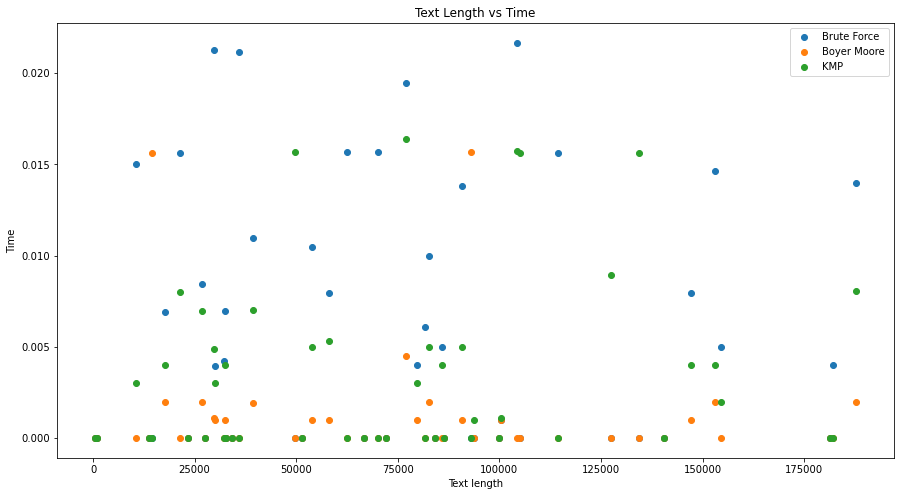

In [19]:
plt.figure(figsize=(15, 8))
plt.xlabel("Text length")
plt.ylabel("Time")
plt.title("Text Length vs Time")
plt.scatter(input_size, time_brute_force)
plt.scatter(input_size, time_boyer_moore)
plt.scatter(input_size, time_kmp)
plt.legend(["Brute Force", "Boyer Moore", "KMP "])

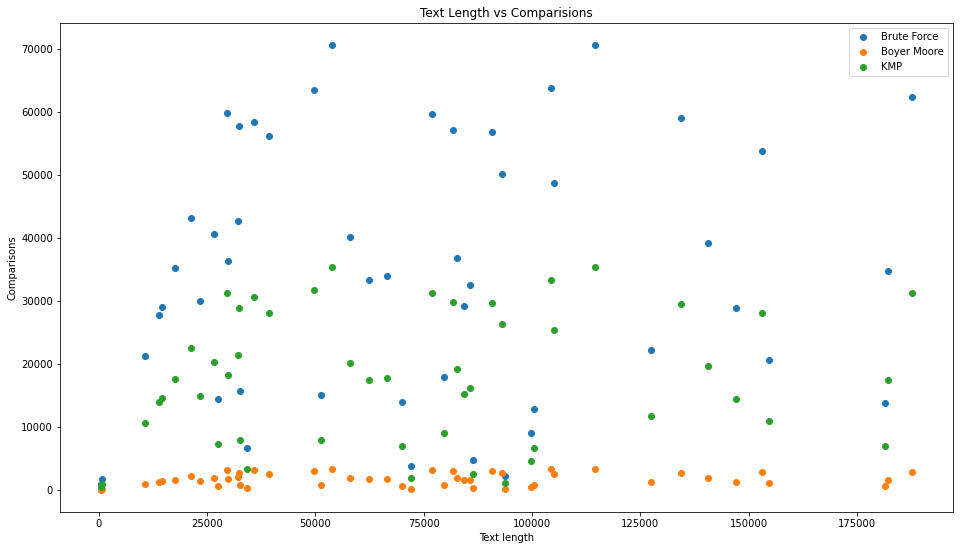

In [20]:
plt.figure(figsize=(16, 9))
plt.xlabel("Text length")
plt.ylabel("Comparisons")
plt.title("Text Length vs Comparisions")
plt.scatter(input_size, comparison_brute_force)
plt.scatter(input_size, comparison_boyer_moore)
plt.scatter(input_size, comparison_kmp)
plt.legend(["Brute Force", "Boyer Moore", "KMP "])

Explanation:

Force majeure:

The inner loop is repeated m times.

(In our case, three times)

The outer loop runs n-m+1 times.

(It's 17-3+1=15 in our example.)
In the worst scenario, the number of comparisons would be m*(n-m+1), which is 45.
Boyer-Moore:
In this situation, the number of comparisons will be equal to the length of the text string, so because the text string is 17 characters long, the number of comparisons will be 17 as well.
(Note that when the pattern length grows, the algorithm's character comparison efficiency grows as well.)
With the use of the kmp fail function, there is an improvement in comparisons compared to the brute force strategy because this technique bypasses checking the same spots that are sure of not matching.


The time taken for each algorithm for different cases can be justified by looking at the number comparisons that algorithm takes to complete the search.

Results summary for time complexity of each algorithm:

Note:
n is the length of text string
m is the length of pattern
sigma is the size of the bad character table generated by the Boyer Moore algorithm
Brute force
Best case:o(n)
Worst case:o(m*(n-m+1))
KMP
Preprocessing time:o(m)
Matching time:o(m+n)
Boyer-Moore
preprocessing time:o(m+sigma)
Best:Omega(n/m)
worst:o(mn)


                                          Question 3

Problem 3: Matrix-chain Multiplication The matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully parenthesize the product < D1 ·D2 · · · Dn > in a way so that the number of scalar multiplications is minimized. Each Di has a pi−1 × pi dimension and i = 1, 2, . . . , n.

The Brute-Force: [10 pt.]: Implement a Python program to solve the matrix-chain multiplication problem by the brute force algorithm
import sys

In [21]:
import sys

optimal_mul = []

parans  = [[0 for x in range(5)] for x in range(5)]
min_mult  = [[0 for x in range(100)] for x in range(100)]


def Print_optimalparans_bf(i, j , paranthesis, sec, temp):
    if i == j :
        optimal_mul.append(sec)
        print(sec,end="")
        temp+=1
        return 
    
    optimal_mul.append('(')
    print('(',end="")
    Print_optimalparans_bf(i, parans[i][j], parans, chr(ord(sec) + 1),  temp+1)
    Print_optimalparans_bf(parans[i][j]+1, j ,parans, sec, temp+1)
    optimal_mul.append(')')
    print(')',end="")
    
 
def Min_scalar_brute(mat, i, j):
 
    if i == j:
        return 0
 
    _min = sys.maxsize
 
    for k in range(i, j):
 
        count = (Min_scalar_brute(mat, i, k)
                 + Min_scalar_brute(mat, k + 1, j)
                 + mat[i-1] * mat[k] * mat[j])
 
        if count < _min:
            _min = count
            
            print("i :",i," j: ",j, " k :",k)
            
            print("parans : ", parans[i][j], " count : ", min_mult[i][j])
            if  parans[i][j] > 0:
                print("more than one matrix multiplication, count : ", count)
                
            parans[i][j] = k
            min_mult[i][j] = count

    return _min


if __name__ == '__main__':


    matrix_dimensions = [1, 2, 3, 4, 3]

    num = len(matrix_dimensions)

    print("Minimum number of multiplications using brute-force is ",
          Min_scalar_brute(matrix_dimensions, 1, num-1))
    
    sec = 'A'
    temp = 0
    for i in range(num):
        print(parans[i])
        
    print ("Paranthesis order for minimum multiplications : ")
    
    Print_optimalparans_bf(1, num-1, parans, sec,  temp)

i : 3  j:  4  k : 3
parans :  0  count :  0
i : 2  j:  4  k : 2
parans :  0  count :  0
i : 2  j:  3  k : 2
parans :  0  count :  0
i : 2  j:  4  k : 3
parans :  2  count :  54
more than one matrix multiplication, count :  48
i : 1  j:  4  k : 1
parans :  0  count :  0
i : 1  j:  2  k : 1
parans :  0  count :  0
i : 3  j:  4  k : 3
parans :  3  count :  36
more than one matrix multiplication, count :  36
i : 1  j:  4  k : 2
parans :  1  count :  54
more than one matrix multiplication, count :  51
i : 2  j:  3  k : 2
parans :  2  count :  24
more than one matrix multiplication, count :  24
i : 1  j:  3  k : 1
parans :  0  count :  0
i : 1  j:  2  k : 1
parans :  1  count :  6
more than one matrix multiplication, count :  6
i : 1  j:  3  k : 2
parans :  1  count :  32
more than one matrix multiplication, count :  18
i : 1  j:  4  k : 3
parans :  2  count :  51
more than one matrix multiplication, count :  30
Minimum number of multiplications using brute-force is  30
[0, 0, 0, 0, 0]
[0, 0

Bottom up - Dynammic programming :
The same steps as for dynamic programming from the bottom up are followed. However, only the half diagonal cells are calculated for the matrix m and s calculations because I is always i=j but not i>j. As a result, the computations at the bottom of the diagonal should be omitted.

The values of the cells in the diagonal are set to 0, indicating that we have a single matrix, such as m[1,1] or m[2,2]. We next go to the next diagonal and calculate the cell values using the difference of 1,2,3.

In [22]:
def print_parenthesis(s, start, end):
   
    if start == end:
        print('A[{}]'.format(start), end='')
        return
    
    k = s[start][end]
    #print(s)
 
    print('(', end='')
    print_parenthesis(s, start, k)
    print_parenthesis(s, k + 1, end)
    print(')', end='')

In [ ]:
import sys

 
 
def matrix_chain(p, n):
   
    m = [[0 for x in range(n)] for x in range(n)]
    s = [[0 for x in range(n)] for x in range(n)]
 
  
 
    for i in range(1, n):
        m[i][i] = 0
 
    
    for diff in range(2, n):
        for i in range(1, n-diff + 1):
            j = i + diff-1
            m[i][j] = float('inf')
            for k in range(i, j):
 
             
                cost = m[i][k] + m[k + 1][j] + p[i-1]*p[k]*p[j]
                if cost < m[i][j]:
                    m[i][j] = cost
                    s[i][j] = k
    print('Parenthesization: ', end='')               
    print_parenthesis(s, 1, len(p)-1)
    print("\n")
    return m[1][n-1]

#p = [5, 10, 3, 12, 5, 50, 6]
#n=Len(p)
n = int(input('Enter the number of matrices: '))
p = []
for i in range(n):
    value = int(input(f'Enter the number of rows in matrix {i+1}: '))
    p.append(value)
value = int(input(f'Enter the number of coLumns in matrix {n}: '))
p.append(value)
print("\n")
print("The number of muLtipLications :",matrix_chain(p,len(p)))




In [ ]:
def m_s_cal(p):
   
    m = [[-1]*len(p) for i in range(len(p))]
    s = [[-1]*len(p) for i in range(len(p))]
 
    matrix_chain(p, 1, len(p) - 1, m, s)
 
    return m, s
 
 
def matrix_chain(p, start_index, end_index, m, s):
   
    if m[start_index][end_index] >= 0:
        return m[start_index][end_index]
 
    if start_index == end_index:
        cost = 0
    else:
        cost = float('inf')
        for k in range(start_index, end_index):
            temp = matrix_chain(p, start_index, k, m, s) + matrix_chain(p, k + 1, end_index, m, s) + p[start_index - 1]*p[k]*p[end_index]
            if cost > temp:
                cost = temp
                s[start_index][end_index] = k
 
    m[start_index][end_index]=cost
    return cost
 
 



n = int(input('Enter the number of matrices: '))
p = []
for i in range(n):
    value = int(input(f'Enter the number of rows in matrix {i+1}: '))
    p.append(value)
value = int(input(f'Enter the number of coLumns in matrix {n}: '))
p.append(value)
m, s = m_s_cal(p)
print('The number of multiplications ', m[1][len(p)-1])
print('Parenthesization: ', end='')
print_parenthesis(s, 1, len(p)-1)
 
 


Here we make recursive call to the same subproblems .

First when the subproblem is visited , we calculate the cost and maintain this value in the table . When the same sub problem is once again called , we can look at the table directly as its value is maintained . That is the advantage of dynamic programming with memoizationfor matrix chain multiplication .

                                           Question 4

Question 4 :
Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results. Longest Common Sub-sequence (LCS) problem: Given two character strings over some alphabet, find a longest string that is a sub-sequence of given two strings.



In [ ]:
def lcs(s1,s2):
 x=len(s1)
 y=len(s2)

 matrix = [ [ None for i in range(y+1) ] for j in range(x+1) ] #creating a table for s1 and s2 and their similarities
 
 for i in range(x+1):
  for j in range(y+1):
    # when row or column in the table are of index 0
    if i==0 or j==0:
        
        matrix[i][j]=0
    # when there is a match in the s1 and s2 sequence element    
    elif s1[i-1]==s2[j-1]:
       
        matrix[i][j]=matrix[i-1][j-1]+1
    # when mismatch happens , returning the max of the sub sequene of s1 and s2    
    else:
        
        matrix[i][j]=max(matrix[i-1][j],matrix[i][j-1])
 print("longest common sub sequence length is :",matrix[x][y])       
      
 length_sub_seq= matrix[x][y] # containg the length od longest common subsequence . 
 sub_seq=[""]*(length_sub_seq+1)# list for common sub sequence 
 sub_seq[length_sub_seq]=""
 i=x
 j=y
  
 while i>0 and j>0:
    if s1[i-1]==s2[j-1]:
       #inserting the common subsequence element into list
       sub_seq[length_sub_seq-1]= s1[i-1]
       i-=1
       j-=1
       length_sub_seq-=1
    elif matrix[i-1][j]>matrix[i][j-1]:
        i-=1
    else:
        j-=1
      
 return sub_seq         
     

S1="ATTAAAGGTTTATACCTTCCCAGAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG"
S2="AAATGGTATATTAGAGTAHGJFKKSSATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
#print(len(S1))
#print(len(S2))

# length of DNA s1 seq : 500
# length of DNA s2 seq : 1881



print("Longest common subsequence is :","".join(lcs(S1,S2)))

First, we made a table with the number of rows and columns equal to the length of both sequences, i.e. s1 and s2.
When the sequences s1 and s2 match, the cell in the table is incremented by 1 with the previous subsequence, i.e table[i-1][j-1]. The range of len(s1) is I while the range of len(s2) is j. (s2).
Finding the greatest value of the subsequence table[i-1][j],table[i][j-1] and placing it in the table[i][j] when there is a mismatch
The length of the longest common subsequence of the given sequences is returned by the table's last bottom cell, table[len(s1)][len(s2)].

Returning the length of the longest common subsequence by comparing the sequence from the end to the beginning of the sequences and the table's bottom most right.
If there is a match, we append the sequence to the list and traverse the table diagonally, from bottom to top, from right to left, i.e. table[i-1][j-1].
If there is a match, decrement 1 in the table values for the previous subsequence of s1 and s2 (table[i-1][j] and table[i][j-1]).
Finally, for the given sequences, the List returns the longest common subsequence.